# PAP2 Versuch 242: Spannungsverstärkung

Aufgabe 1a: Gleichspannungsverstärkung

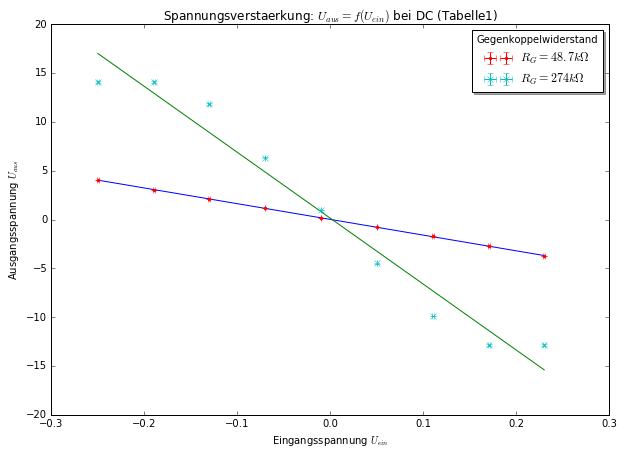

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
from scipy.optimize import curve_fit

U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err = np.loadtxt('tab1.txt', skiprows=1, usecols=(0,1,2,3,4,5), unpack=True)

def f(x, A, B): # Definition der Ausgleichsgerade y=f(x)
    return A*x + B

A1,B1 = curve_fit(f, U_ein, U_aus1)[0] # Fit für Gerade 1
A2,B2 = curve_fit(f, U_ein, U_aus2)[0] # Fit für Gerade 2


plt.plot(U_ein, f(U_ein, A1, B1))
plt.plot(U_ein, f(U_ein, A2, B2))
plt.errorbar(U_ein, U_aus1, linestyle='None', marker='.', label='$R_{G}=48.7 k\Omega$', xerr=ein_err, yerr=aus1_err)
plt.errorbar(U_ein, U_aus2, linestyle='None', marker='x', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus2_err)


plt.xlabel('Eingangsspannung $U_{ein}$')
plt.ylabel('Ausgangsspannung $U_{aus}$')
plt.title('Spannungsverstaerkung: $U_{aus}=f(U_{ein})$ bei DC (Tabelle1)')
plt.legend(title='Gegenkoppelwiderstand', loc='best', shadow='true')
plt.savefig('V242_A1a.png', dpi=144)

Aufgabe 1b: Wechselspannungsverstärkung

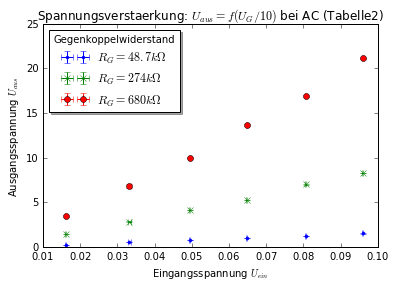

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err, U_aus3, aus3_err = np.loadtxt('tab2.txt', skiprows=1, usecols=(0,1,2,3,4,5,6,7), unpack=True)

U_ein = U_ein/10
ein_err = ein_err/10

plt.errorbar(U_ein, U_aus1, linestyle='None', marker='.', label='$R_{G}=48.7 k\Omega$', xerr=ein_err, yerr=aus1_err)
plt.errorbar(U_ein, U_aus2, linestyle='None', marker='x', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus2_err)
plt.errorbar(U_ein, U_aus3, linestyle='None', marker='o', label='$R_{G}=680 k\Omega$', xerr=ein_err, yerr=aus3_err)
plt.xlabel('Eingangsspannung $U_{ein}$')
plt.ylabel('Ausgangsspannung $U_{aus}$')
plt.title('Spannungsverstaerkung: $U_{aus}=f(U_{G}/10)$ bei AC (Tabelle2)')
plt.legend(title='Gegenkoppelwiderstand', loc='best', shadow='true')
plt.savefig('V242_A1b.png', dpi=144)

Aufgabe 2: Frequenzgang mit Gegenkopplungen und Kondensator

Current size: [6.0, 4.0]


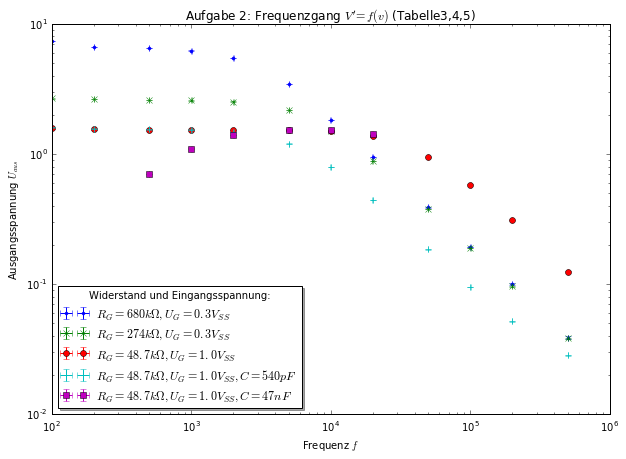

In [40]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

f, f_err, U_A1, A1_err, U_A2, A2_err, U_A3, A3_err, U_A4, A4_err, U_A5, A5_err = np.loadtxt('tab3.txt', skiprows=1, usecols=(0,1,2,3,4,5,6,7,8,9,10,11), unpack=True)

plt.xscale('log')
plt.yscale('log')

plt.errorbar(f, U_A1, linestyle='None', marker='.', label='$R_{G}=680 k\Omega, U_{G}=0.3 V_{SS}$', xerr=f_err, yerr=A1_err)
plt.errorbar(f, U_A2, linestyle='None', marker='x', label='$R_{G}=274 k\Omega, U_{G}=0.3 V_{SS}$ ', xerr=f_err, yerr=A2_err)
plt.errorbar(f, U_A3, linestyle='None', marker='o', label='$R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}$', xerr=f_err, yerr=A3_err)
plt.errorbar(f, U_A4, linestyle='None', marker='+', label='$R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=540 pF$', xerr=f_err, yerr=A4_err)
plt.errorbar(f, U_A5, linestyle='None', marker='s', label='$R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=47 nF$', xerr=f_err, yerr=A5_err)

plt.xlabel('Frequenz $f$')
plt.ylabel('Ausgangsspannung $U_{aus}$')
plt.title('Aufgabe 2: Frequenzgang $V\'=f(v)$ (Tabelle3,4,5)')
plt.legend(title='Widerstand und Eingangsspannung:', loc='lower left', shadow='true')

plt.savefig('A242_A2.png', dpi=144)